# **AUTO-LIB CAR SHARING SERVICE COMPANY**

## 1.1 Defining the Question
We'll work as a Data Scientist for Autolib, an electric car-sharing service, to look into a claim concerning blue cars based on the Autolib dataset.

In order to accomplish so, we must first choose specific places and time periods of interest through sampling, explaining why we chose that strategy, and then conduct hypothesis testing on the claim we have made.

A detailed report on our hypothesis can be found [here](https://docs.google.com/document/d/113dMO8j0PRrKXOpX86mRVZiwDs_moH1LmOv3EInqsdc/edit#).

## 1.2 What is our hypothesis? (Research Question)
Investigate a claim about the blue cars from the autolib dataset.

Null Hypothesis: The mean of Blue Cars taken on weekends is equal to the mean of Utilib Cars taken on weekends

μ1=μ2

Alternative Hypothesis: The mean of Blue Cars taken on weekends is not equal to the mean of Utilib Cars taken on weekends

μ1≠μ2

## 1.3 Recording the Experimental Design
Defining the research question

Finding and dealing with outliers, anomalies, and missing data within the dataset.

Plotting appropriate univariate and bivariate summaries recording our observations.

Implement the solution by performing hypothesis testing.

## 1.4 Metrics for Success
The study is considered successful if the null hypothesis is true.

## 1.5 Relevance
The data that was used for survey was obtained from an open datasource. The provided dataset is a daily aggregation, by date and postal code, of the number of events on the Autolib network (car-sharing and recharging). The dataset used was ranging from January to July of 2018 and is relevant for this analysis.

## 1.5 Importing Libraries

In [1]:
# Importing the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import poisson
from scipy import stats
from scipy.stats import shapiro
from statsmodels.stats import weightstats as stests

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## 1.6 Reading the datasets

In [2]:
# Loading the Dataset from the source i.e. excel
# Loading the Dataset that describes the dataset.

autolib_desc = pd.read_excel("/content/columns_explanation.xlsx")

In [3]:
# Loading the autolib dataset

autolib = pd.read_csv("/content/autolib_daily_events_postal_code.csv")

## 1.7 Checking the data

### 1.7.1 Previewing the variable definitions dataset

In [4]:
# Previewing the Variable dataset
autolib_desc

,Column name,explanation
0,Postal code,postal code of the area (in Paris)
1,date,date of the row aggregation
2,n_daily_data_points,number of daily data poinst that were availabl...
3,dayOfWeek,identifier of weekday (0: Monday -> 6: Sunday)
4,day_type,weekday or weekend
5,BlueCars_taken_sum,Number of bluecars taken that date in that area
6,BlueCars_returned_sum,Number of bluecars returned that date in that ...
7,Utilib_taken_sum,Number of Utilib taken that date in that area
8,Utilib_returned_sum,Number of Utilib returned that date in that area
9,Utilib_14_taken_sum,Number of Utilib 1.4 taken that date in that area


### 1.7.2 Previewing the autolib dataset

In [5]:
# Determining the no. of records in our autolib dataset
autolib.shape

(16085, 13)

Our dataset has 16085 rows and 13 columns.


In [6]:
# Previewing the top of our dataset

autolib.head()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,01/01/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,01/02/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,01/03/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,01/04/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,01/05/2018,1440,4,weekday,114,117,3,3,6,6,18,20


In [7]:
# Previewing the bottom of our dataset

autolib.tail()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
16080,95880,6/15/2018,1440,4,weekday,15,10,0,0,2,3,0,0
16081,95880,6/16/2018,1440,5,weekend,19,19,0,0,2,1,0,0
16082,95880,6/17/2018,1440,6,weekend,33,35,1,1,0,0,0,0
16083,95880,6/18/2018,1440,0,weekday,11,14,3,5,2,2,0,0
16084,95880,6/19/2018,1370,1,weekday,2,2,2,1,0,0,0,0


In [8]:
# Checking whether each column has an appropriate datatype
autolib.dtypes

Postal code                int64
date                      object
n_daily_data_points        int64
dayOfWeek                  int64
day_type                  object
BlueCars_taken_sum         int64
BlueCars_returned_sum      int64
Utilib_taken_sum           int64
Utilib_returned_sum        int64
Utilib_14_taken_sum        int64
Utilib_14_returned_sum     int64
Slots_freed_sum            int64
Slots_taken_sum            int64
dtype: object

## 1.8 Tidying the dataset

### 1.8.1 Renaming columns


Using the same pattern for column names, i.e. using lower case and '_' to make a single word for two-word columns.

In [9]:
# Using the same format for all column names by:
# Renaming the columns to combine the names of the columns into a single word and lowering the case

autolib.columns = autolib.columns.str.lower().str.replace(' ', '_')
autolib.head()

,postal_code,date,n_daily_data_points,dayofweek,day_type,bluecars_taken_sum,bluecars_returned_sum,utilib_taken_sum,utilib_returned_sum,utilib_14_taken_sum,utilib_14_returned_sum,slots_freed_sum,slots_taken_sum
0,75001,01/01/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,01/02/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,01/03/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,01/04/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,01/05/2018,1440,4,weekday,114,117,3,3,6,6,18,20


### 1.8.2 Identifying uniques values within the dataset for each column

In [10]:
# Are there any unique values in each column entry in the dataset?
for i in autolib.columns:
 print(autolib[i].unique())
 print ("\n")

[75001 75002 75003 75004 75005 75006 75007 75008 75009 75010 75011 75012
 75013 75014 75015 75016 75017 75018 75019 75020 75112 75116 78000 78140
 78150 91330 91370 91400 92000 92100 92110 92120 92130 92140 92150 92160
 92170 92190 92200 92210 92220 92230 92240 92250 92260 92270 92290 92300
 92310 92320 92330 92340 92350 92360 92370 92380 92390 92400 92410 92420
 92500 92600 92700 92800 93100 93110 93130 93150 93170 93200 93230 93260
 93300 93310 93350 93360 93370 93390 93400 93440 93500 93600 93700 93800
 94000 94100 94110 94120 94130 94140 94150 94160 94220 94230 94300 94340
 94410 94450 94500 94700 94800 95100 95870 95880]


['01/01/2018' '01/02/2018' '01/03/2018' '01/04/2018' '01/05/2018'
 '01/06/2018' '01/07/2018' '01/08/2018' '01/09/2018' '01/10/2018'
 '01/11/2018' '01/12/2018' '1/13/2018' '1/14/2018' '1/15/2018' '1/16/2018'
 '1/17/2018' '1/18/2018' '1/19/2018' '1/20/2018' '1/21/2018' '1/22/2018'
 '1/23/2018' '1/24/2018' '1/25/2018' '1/26/2018' '1/27/2018' '1/28/2018'
 '1/29/2018

### 1.8.3 Dropping Irrelevant Fields

In [11]:
# Dropping irrelevant columns
autolib.drop(['date', 'n_daily_data_points','bluecars_returned_sum','utilib_14_taken_sum', 'utilib_14_returned_sum','utilib_returned_sum','slots_freed_sum', 'slots_taken_sum'], axis=1, inplace=True)
autolib

,postal_code,dayofweek,day_type,bluecars_taken_sum,utilib_taken_sum
0,75001,0,weekday,110,3
1,75001,1,weekday,98,1
2,75001,2,weekday,138,0
3,75001,3,weekday,104,2
4,75001,4,weekday,114,3
...,...,...,...,...,...
16080,95880,4,weekday,15,0
16081,95880,5,weekend,19,0
16082,95880,6,weekend,33,1
16083,95880,0,weekday,11,3


### 1.8.4 Missing Values


Identifying and dealing with missing values within the dataset.

In [12]:
# Determining the number of items in each column and the data type of each column
autolib.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16085 entries, 0 to 16084
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   postal_code         16085 non-null  int64 
 1   dayofweek           16085 non-null  int64 
 2   day_type            16085 non-null  object
 3   bluecars_taken_sum  16085 non-null  int64 
 4   utilib_taken_sum    16085 non-null  int64 
dtypes: int64(4), object(1)
memory usage: 628.4+ KB


In [13]:
# Identifying Missing Data.
autolib.isnull().sum()

postal_code           0
dayofweek             0
day_type              0
bluecars_taken_sum    0
utilib_taken_sum      0
dtype: int64

There are no missing values within our dataset

### 1.8.5 Anomalies

In [14]:
# Checking for Anomalies
# There were no anomalies within our dataset.

In [15]:
# Extracting day type data 
autolib_df = autolib[autolib.day_type == 'weekend']
autolib_df

,postal_code,dayofweek,day_type,bluecars_taken_sum,utilib_taken_sum
5,75001,5,weekend,187,6
6,75001,6,weekend,180,2
12,75001,5,weekend,224,2
13,75001,6,weekend,193,2
19,75001,5,weekend,217,2
...,...,...,...,...,...
16068,95880,6,weekend,36,1
16074,95880,5,weekend,15,0
16075,95880,6,weekend,34,0
16081,95880,5,weekend,19,0


I choose to work with the weekends because the selection just required one set of data, which can be either weekends or weekdays.

In [16]:
autolib_df.nunique()

postal_code           104
dayofweek               2
day_type                1
bluecars_taken_sum    744
utilib_taken_sum       47
dtype: int64

## 1.9 Exploratory Data Analysis

### 1.9.1 Univariate Analysis

Provides summary statistics for each field in the raw data collection (or a single variable summary). Here's what we'll be looking at:

1. Measure of central tendency.
2. Measures of Dispersion/Variability/Spread.
3. Visualisation of field by using pie charts and histogram and Frequency tables.

In [17]:
# Description of all the numerical data columns
autolib_df[['bluecars_taken_sum','utilib_taken_sum']].describe()

,bluecars_taken_sum,utilib_taken_sum
count,4541.000000,4541.000000
mean,151.090068,4.393085
std,218.565642,6.747905
min,0.000000,0.000000
25%,25.000000,0.000000
50%,59.000000,2.000000
75%,156.000000,5.000000
max,1352.000000,54.000000


Descriptive Analysis of the bluecars_taken_sum and the utilib_taken_sum column

#### Mean, Mode and Median

In [18]:
# Mode
autolib_df.bluecars_taken_sum.mode()

0    14
dtype: int64

In [19]:
# Mode
autolib_df.utilib_taken_sum.mode()

0    0
dtype: int64

In [20]:
# Median
autolib_df.bluecars_taken_sum.median()

59.0

In [21]:
# Median
autolib_df.utilib_taken_sum.median()

2.0

In [22]:
# Mean
autolib_df.bluecars_taken_sum.mean()

151.09006826690157

In [23]:
# Mean
autolib_df.utilib_taken_sum.mean()

4.393085223519049

#### Range and Interquartile Range

In [24]:
# Find the range between the maximum and minimum value

# Blue cars
maximum_value = autolib_df.bluecars_taken_sum.max()
minimum_value = autolib_df.bluecars_taken_sum.min()
range = maximum_value - minimum_value

# Utilib
maximum_value = autolib_df.utilib_taken_sum.max()
minimum_value = autolib_df.utilib_taken_sum.min()
range1 = maximum_value - minimum_value

print('Blue car:',range)
print('Utilib car:',range1)

Blue car: 1352
Utilib car: 54


In [25]:
#Find the quartiles of the bluecars_taken_sum column

autolib_df.bluecars_taken_sum.quantile([0.25, 0.5, 0.75])

0.25     25.0
0.50     59.0
0.75    156.0
Name: bluecars_taken_sum, dtype: float64

In [26]:
#Find the quartiles of the utilib taken sum column

autolib_df.utilib_taken_sum.quantile([0.25, 0.5, 0.75])

0.25    0.0
0.50    2.0
0.75    5.0
Name: utilib_taken_sum, dtype: float64

#### Standard Deviation, Variance, Kurtosis and Skewness

In [27]:
# Autolib blue cars taken sum column

print("Standard Deviation: ",autolib_df.bluecars_taken_sum.std())
print("Variance: ",autolib_df.bluecars_taken_sum.var())
print("Kurtosis: ",autolib_df.bluecars_taken_sum.kurt())
print("Skewness: ",autolib_df.bluecars_taken_sum.skew())

Standard Deviation:  218.5656415891513
Variance:  47770.93968327735
Kurtosis:  5.295039714140337
Skewness:  2.3007208190452824


In [28]:
# Autolib utilib cars taken sum column

print("Standard Deviation: ",autolib_df.utilib_taken_sum.std())
print("Variance: ",autolib_df.utilib_taken_sum.var())
print("Kurtosis: ",autolib_df.utilib_taken_sum.kurt())
print("Skewness: ",autolib_df.utilib_taken_sum.skew())

Standard Deviation:  6.747904600134372
Variance:  45.53421649251461
Kurtosis:  6.702680453433318
Skewness:  2.450482888938684


1. The Kurtosis is > 0 meaning it is leptokurtic, the tail in this distribution is heavy.
There are outliers present in our dataset.
2. Because the skewness is greater than zero, the dataset is positively skewed.

#### The blue-cars-taken-sum and utilib car taken sum column visualizations

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


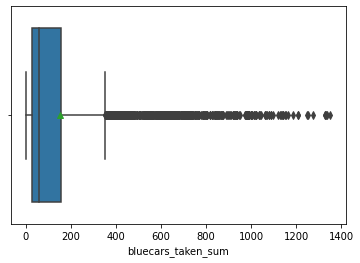

In [29]:
# Boxplot
sns.boxplot(autolib_df['bluecars_taken_sum'],showmeans = True)

Beyond the threshold, there appear to be outliers. Let's see whether we can prove the presence of outliers.

In [30]:
# Checking for outliers in the bluecars taken column

Q1 = autolib_df.bluecars_taken_sum.quantile(0.25)
Q3 = autolib_df.bluecars_taken_sum.quantile(0.75)

IQR = Q3 - Q1

outliers = ((autolib_df.bluecars_taken_sum < Q1 - 1.5 * IQR) | (autolib_df.bluecars_taken_sum > Q3 + 1.5 * IQR))
outliers.value_counts()

False    3888
True      653
Name: bluecars_taken_sum, dtype: int64


There are 653 outliers beyond the range threshold. However, removing the outliers would result in an inconclusive result because they could still be viable submissions.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'distribution of blue cars taken')

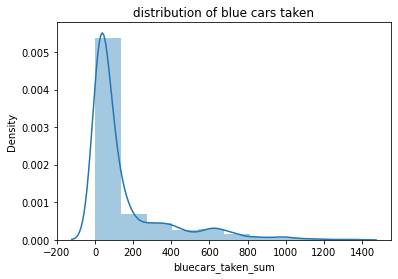

In [31]:
# Plotting a histogram showing distribution of the BlueCars taken column

sns.distplot(autolib_df['bluecars_taken_sum'], bins=10)
plt.title('distribution of blue cars taken')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


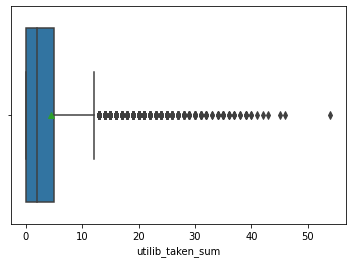

In [32]:
# Boxplot Utilib taken 
sns.boxplot(autolib_df['utilib_taken_sum'],showmeans = True)

Beyond the threshold, there appear to be outliers. Let's see whether we can prove the presence of outliers.

In [33]:
# Checking for outliers in the utilib cars taken column

Q1 = autolib_df.utilib_taken_sum.quantile(0.25)
Q3 = autolib_df.utilib_taken_sum.quantile(0.75)

IQR = Q3 - Q1

outliers = ((autolib_df.utilib_taken_sum < Q1 - 1.5 * IQR) | (autolib_df.utilib_taken_sum > Q3 + 1.5 * IQR))
outliers.value_counts()

False    4050
True      491
Name: utilib_taken_sum, dtype: int64

There are 491 outliers beyond the range threshold. However it would result in an inconclusive outcome if the outliers are actually removed since they can be viable entries.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'distribution of blue cars taken')

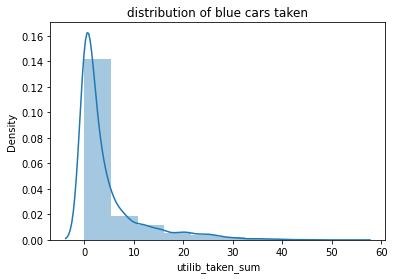

In [34]:
# Plotting a histogram showing distribution of the utilib taken column

sns.distplot(autolib_df['utilib_taken_sum'], bins=10)
plt.title('distribution of blue cars taken')

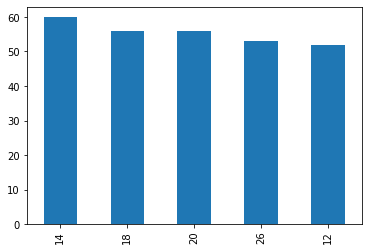

In [35]:
# Bar plot blue car taken column
autolib_df['bluecars_taken_sum'].value_counts().head().plot.bar()

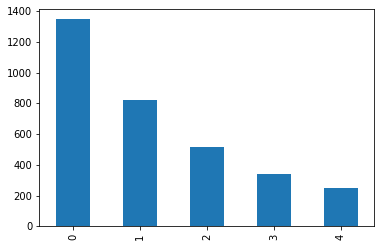

In [36]:
# Bar plot utilib car taken column
autolib_df['utilib_taken_sum'].value_counts().head().plot.bar()

**Recommendations based on the Univariate Analysis**


*   The Kurtosis of the numerical data columns indicates that the data distribution is heavy-tailed and not normally distributed in most circumstances.

*   Outliers are valid entries that should not be eliminated.





### 1.9.2 Bivariate analysis

#### Numerical & Numerical

Text(0.5, 1.0, 'bluecars_taken vs utilib_taken_sum')

<Figure size 864x720 with 0 Axes>

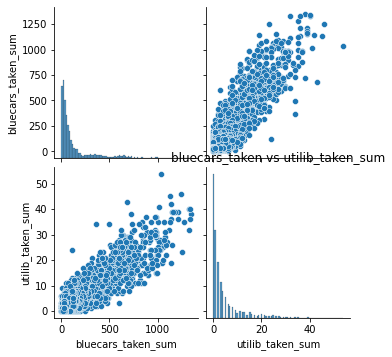

In [37]:
# Determine correlation between numeric features
plt.figure(figsize=(12,10))
sns.pairplot(autolib_df[['bluecars_taken_sum','utilib_taken_sum']])
plt.title('bluecars_taken vs utilib_taken_sum')

Positive correlation is observed in the cars taken vs. utilib cars taken columns.


Correlation 

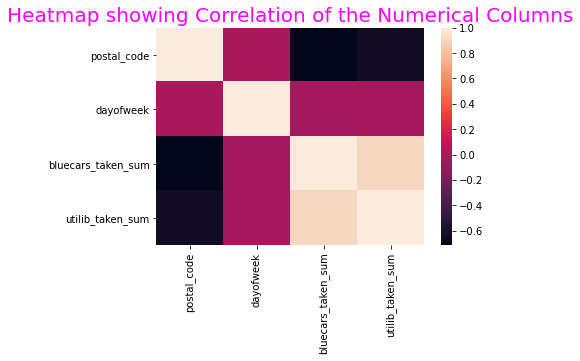

In [38]:
coeff = autolib_df.corr()

plt.figure()
sns.heatmap(coeff, xticklabels=coeff.columns, yticklabels=coeff.columns)
plt.title('Heatmap showing Correlation of the Numerical Columns', color = 'magenta', fontsize = 20)
plt.show()

## 2.0 Hypothesis Testing

**What is our hypothesis?**

Hypothesis testing (using a z-score).

A sample of 1000 values from each postal area has been used. A 95% confidence level has also been used to test the hypothesis.

Null Hypothesis: The mean of Blue Cars taken on weekends is equal to the mean of Utilib Cars taken on weekends

μ1=μ2

Alternative Hypothesis: The mean of Blue Cars taken on weekends is not equal to the mean of Utilib Cars taken on weekends

μ1≠μ2

In [39]:
# Dropping day type column
autolib_df.drop(['day_type'], axis=1, inplace=True)
autolib_df

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,postal_code,dayofweek,bluecars_taken_sum,utilib_taken_sum
5,75001,5,187,6
6,75001,6,180,2
12,75001,5,224,2
13,75001,6,193,2
19,75001,5,217,2
...,...,...,...,...
16068,95880,6,36,1
16074,95880,5,15,0
16075,95880,6,34,0
16081,95880,5,19,0


In [40]:
# Normality Test
from scipy.stats import shapiro

def shapiro_test(autolib_df, col_list):
    for x in col_list:
        print(x)
        data = autolib_df[x]
        stat, p = shapiro(data)
        print('Statistics=%.3f, p=%.3f' % (stat, p))
        # interpret
        alpha = 0.05
        if p > alpha:
            print('Sample looks Gaussian (fail to reject H0)')
        else:
            print('Sample does not look Gaussian (reject H0)')
        print('\n')

In [41]:
# shapiro Wilk's test
shapiro_test(autolib_df, list(autolib_df.columns))

postal_code
Statistics=0.642, p=0.000
Sample does not look Gaussian (reject H0)


dayofweek
Statistics=0.637, p=0.000
Sample does not look Gaussian (reject H0)


bluecars_taken_sum
Statistics=0.667, p=0.000
Sample does not look Gaussian (reject H0)


utilib_taken_sum
Statistics=0.673, p=0.000
Sample does not look Gaussian (reject H0)





#### **Sampling**

I chose to use Stratified Random Sampling.
Why? 

Random samples are the best method of selecting your sample from the population of interest. The advantages are:
- Your sample represents the target population and eliminates sampling bias.

- A stratified sample can provide greater precision than a simple random sample of the same size.
- Because it provides greater precision, a stratified sample often requires a smaller sample.

In [42]:
# Stratified Sampling
autolib_sample= autolib_df.groupby('dayofweek', group_keys=False).apply(lambda grouped_subset : grouped_subset.sample(frac=0.1))
autolib_sample.head(10)

,postal_code,dayofweek,bluecars_taken_sum,utilib_taken_sum
10000,93100,5,245,3
1579,75011,5,714,16
10393,93130,5,31,4
6316,92220,5,74,3
1088,75007,5,387,6
15955,95880,5,25,0
1223,75008,5,449,13
1653,75011,5,579,11
8909,92400,5,133,5
228,75002,5,250,10


In [52]:
autolib_sample.shape

(454, 4)

In [43]:
# Population mean
x = autolib_df['bluecars_taken_sum'].mean()

y = autolib_df['utilib_taken_sum'].mean()

print(x)
print(y)

151.09006826690157
4.393085223519049


In [44]:
# Sample mean
xs = autolib_sample['bluecars_taken_sum'].mean()

ys = autolib_sample['utilib_taken_sum'].mean()

print(xs)
print(ys)

153.43832599118943
4.41409691629956


In [45]:
# Sample standard deviation
sd = autolib_sample['bluecars_taken_sum'].std()
sd

236.0805310889112

In [46]:
autolib_sample[['bluecars_taken_sum','utilib_taken_sum']].apply(stats.zscore)

,bluecars_taken_sum,utilib_taken_sum
10000,0.388269,-0.203649
1579,2.377070,1.668528
10393,-0.519202,-0.059636
6316,-0.336859,-0.203649
1088,0.990422,0.228392
...,...,...
309,0.231370,0.372405
12905,-0.523442,-0.491676
10708,-0.421670,-0.635690
9519,0.286496,0.948460


##### Applying the Z-Test
> We conduct a Z-Test as the final stage of calculations in the attempt to test our hypothesis.
> We conduct a Z-Test if:

>-  Our sample size is greater than 30
>-  Data points are independent from each other.
>-  Data is normally distributed. For sample size greater than 30, this does not always matter.
>-  Data should be randomnly selected.
>-  Sample size should be equal if at all possible.


> We will conduct a two sample z-test. We will check the two independent data groups to decide whether the sample mean of the two groups are equal or not.

In [48]:
ztest, p_value = stests.ztest(autolib_df['bluecars_taken_sum'], x2 = autolib_df['utilib_taken_sum'], value = 0, alternative = 'two-sided')
print('p_value : ', float(p_value))

if p_value < 0.05:
  print('We reject the null hypothesis')
else:
  print('We fail to reject the null hypothesis')

p_value :  0.0
We reject the null hypothesis


Statistical analysis shows that there is a significant difference in the mean of the two areas hence we reject the null hypothesis.

Confidence Level

In [50]:
# Confidence level for Blue Cars
import numpy as np

#sample size
sample_size = len(autolib_sample['bluecars_taken_sum'])
sample_size

#standard error
std_error = autolib_sample['bluecars_taken_sum'].std()/np.sqrt(sample_size)
std_error
# The sample mean
sample_mean = autolib_sample['bluecars_taken_sum'].mean()
# Calculating a confidence interval 
import scipy.stats
from scipy.stats import norm
norm.interval(0.95, loc=sample_mean, scale=std_error)

# We can be 95% certain that the population mean data is between 131.72 and 175.15

(131.7223007350027, 175.15435124737616)

In [51]:
# Confidence level for Utilib Cars

#sample size
sample_size_ut = len(autolib_sample['utilib_taken_sum'])
sample_size_ut

#standard error
std_error_ut = autolib_sample['utilib_taken_sum'].std()/np.sqrt(sample_size_ut)
std_error_ut
# The sample mean
sample_mean = autolib_sample['utilib_taken_sum'].mean()
#Calculating a confidence interval 
import scipy.stats
from scipy.stats import norm
norm.interval(0.95, loc=sample_mean, scale=std_error_ut)

# We can be 95% certain that the population mean data is between 3.77 and 5.05

(3.7746633501981894, 5.05353048240093)

**Conclusion**

We reject our Null Hypothesis of the mean Blue Cars taken on weekends is equal to Utilib Cars taken on weekends because the p-value(0.0) is less than our significance level 0.05